In [13]:
import pystan
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import arviz as az
import pickle

In [14]:
#### Preprocecing ###

In [15]:
jh_dir = "../../COVID-19"

In [16]:
Confirmed = pd.read_csv(jh_dir + "/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [17]:
df = Confirmed.groupby("Country/Region").sum()
df = df.drop(["Lat", "Long"], 1)
df = df.T
df = df.set_index(pd.to_datetime(df.index))
confirmed = df
confirmed = confirmed.cummax()

In [18]:
df = pd.read_csv(jh_dir + "/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
df = df.groupby("Country/Region").sum()
df = df.drop(["Lat", "Long"], 1)
df = df.T
df = df.set_index(pd.to_datetime(df.index))
recovered = df.cummax()

In [19]:
df = pd.read_csv(jh_dir + "/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df = df.groupby("Country/Region").sum()
df = df.drop(["Lat", "Long"], 1)
df = df.T
df = df.set_index(pd.to_datetime(df.index))
death = df.cummax()

In [20]:
### Data Preparation ###

In [21]:
country = 'Japan'
epoch = pd.to_datetime('2020-02-01')
last = pd.to_datetime('2020-04-19')
C0 = confirmed.loc[epoch:last, country].values
R0 = (recovered).loc[epoch:last, country].values
D0 = death.loc[epoch:last, country].values
P = 12000_0000
iteration=10_0000
repeat = 1000

In [22]:
data = {'T': C0.shape[0], 'P': P, 'C0': C0, 'R0': R0, 'D0':D0}

In [23]:
### Model ###

In [24]:
sm_1 = pystan.StanModel(file="single-step.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e893de0091dfdb2e05bc48442797c39f NOW.


In [25]:
sm_2 = pystan.StanModel(file="2-steps.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4e33db4c8940ef7566ae92c64c07cf40 NOW.


In [26]:
sm_const = pystan.StanModel(file="const.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b15ed173cc5ccd34ac626df60e783f41 NOW.


In [32]:
# Train the model and generate samples
fit_start_1 = sm_1.sampling(data=data, iter=iteration, init='random')
fit_start_1


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_e893de0091dfdb2e05bc48442797c39f.
4 chains, each with iter=100000; warmup=50000; thin=1; 
post-warmup draws per chain=50000, total post-warmup draws=200000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
init_inf   7.04  3.0e-3   0.98   5.56   6.37   6.89   7.53   9.42 105415    1.0
b0         0.14  1.4e-5 3.6e-3   0.14   0.14   0.14   0.14   0.15  60437    1.0
b1         0.09  5.3e-6 2.1e-3   0.09   0.09   0.09   0.09    0.1 148801    1.0
theta_b    5.03  3.0e-3   1.19   3.24   4.19   4.85   5.66   7.85 154776    1.0
b_date    71.87  2.8e-4    0.1  71.64  71.81  71.88  71.94  72.04 133706    1.0
q0          0.9  2.8e-4   0.09   0.68   0.85   0.92   0.97    1.0  99602    1.0
q1         0.14  1.2e-4   0.03   0.08   0.12   0.14   0.16   0.19  59528    1.0
theta_q    0.36  2.8e-4   0.07   0.23   0.31   0.36   0.41   0.53  73863    1.0
q_date    37.33  5.9e-3   1.37   34.0  36.62 

In [33]:
# Train the model and generate samples
fit_start_2 = sm_2.sampling(data=data, iter=iteration, init='random')
fit_start_2


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_4e33db4c8940ef7566ae92c64c07cf40.
4 chains, each with iter=100000; warmup=50000; thin=1; 
post-warmup draws per chain=50000, total post-warmup draws=200000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
init_inf  14.48    7.37  10.85    4.4   6.75   9.51  19.63  39.53      2   3.38
b0         0.15    0.04   0.06   0.03   0.13   0.15   0.18   0.29      2   2.32
b1         0.06    0.06   0.08 7.8e-4 7.1e-3   0.02    0.1   0.24      2   5.18
theta_b    0.79    0.29   1.05   0.03   0.07   0.71   0.94   4.02     13   1.13
b_date    29.59    7.24  11.34   6.67  20.85  35.49  39.07  40.09      2   2.37
b2_date   51.05     4.0   5.69  43.05  44.02  52.03  56.59  58.02      2   9.18
b2         0.09  7.0e-3   0.01   0.06   0.08   0.09    0.1   0.11      4   1.41
theta_b2   2.01    1.49   2.25   0.21   0.34   0.58   3.53   7.41      2   2.64
q0          0.7    0.22   0.32   0.12   0.37 

In [31]:
# Train the model and generate samples
fit_const = sm_const.sampling(data=data, iter=iteration, init='random')
fit_const


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_b15ed173cc5ccd34ac626df60e783f41.
4 chains, each with iter=100000; warmup=50000; thin=1; 
post-warmup draws per chain=50000, total post-warmup draws=200000.

              mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
init_inf     14.35    0.04   1.41  12.09  13.36  14.15  15.12  17.77   1575    1.0
b              0.1  5.9e-6 9.9e-4    0.1    0.1    0.1    0.1    0.1  28177    1.0
a             0.01  2.7e-6 3.4e-4 9.6e-310.0e-3   0.01   0.01   0.01  15206    1.0
d           2.1e-3  8.5e-7 1.5e-4 1.8e-3 2.0e-3 2.1e-3 2.2e-3 2.4e-3  31133    1.0
q             0.91  1.8e-3   0.07   0.74   0.87   0.93   0.97    1.0   1514    1.0
NI[1]         1.46  3.6e-3   0.14   1.24   1.36   1.43   1.53   1.79   1467    1.0
NI[2]         1.59  3.9e-3   0.15   1.36   1.48   1.56   1.66   1.95   1455    1.0
NI[3]         1.73  4.2e-3   0.16   1.48   1.61    1.7   1.81   2.13   1444    1.0
NI[4]         1.88

In [ ]:
# Save models

In [ ]:
import pickle
with open("sm1_fit.pkl", "wb") as f:
    pickle.dump({'model' : sm_1, 'fit' : fit_start_1}, f, protocol=-1)
    # or with a list
    # pickle.dump([model, fit], f, protocol=-1)

In [ ]:
import pickle
with open("sm2_fit.pkl", "wb") as f:
    pickle.dump({'model' : sm_2, 'fit' : fit_start_2}, f, protocol=-1)
    # or with a list
    # pickle.dump([model, fit], f, protocol=-1)

In [ ]:
import pickle
with open("sm_const_fit.pkl", "wb") as f:
    pickle.dump({'model' : sm_const, 'fit' : fit_const}, f, protocol=-1)
    # or with a list
    # pickle.dump([model, fit], f, protocol=-1)

In [ ]:
### Load modesl

In [ ]:
with open("sm1_fit.pkl", "rb") as f:
    data_dict = pickle.load(f)
    # or with a list
    # data_list = pickle.load(f)
sm_1 = data_dict['model']
fit_start_1 = data_dict['fit']
# fit = data_list[1]

In [ ]:
with open("sm2_fit.pkl", "rb") as f:
    data_dict = pickle.load(f)
    # or with a list
    # data_list = pickle.load(f)
sm_2 = data_dict['model']
fit_start_2 = data_dict['fit']
# fit = data_list[1]

In [ ]:
with open("sm_const_fit.pkl", "rb") as f:
    data_dict = pickle.load(f)
    # or with a list
    # data_list = pickle.load(f)
sm_const = data_dict['model']
fit_const = data_dict['fit']
# fit = data_list[1]

In [ ]:
### Convergence

In [34]:
data_const = az.from_pystan(fit_const, log_likelihood='log_lik')
data_1 = az.from_pystan(fit_start_1, log_likelihood='log_lik')
data_2 = az.from_pystan(fit_start_2, log_likelihood='log_lik')

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fecc1d33350>,
      dtype=object)

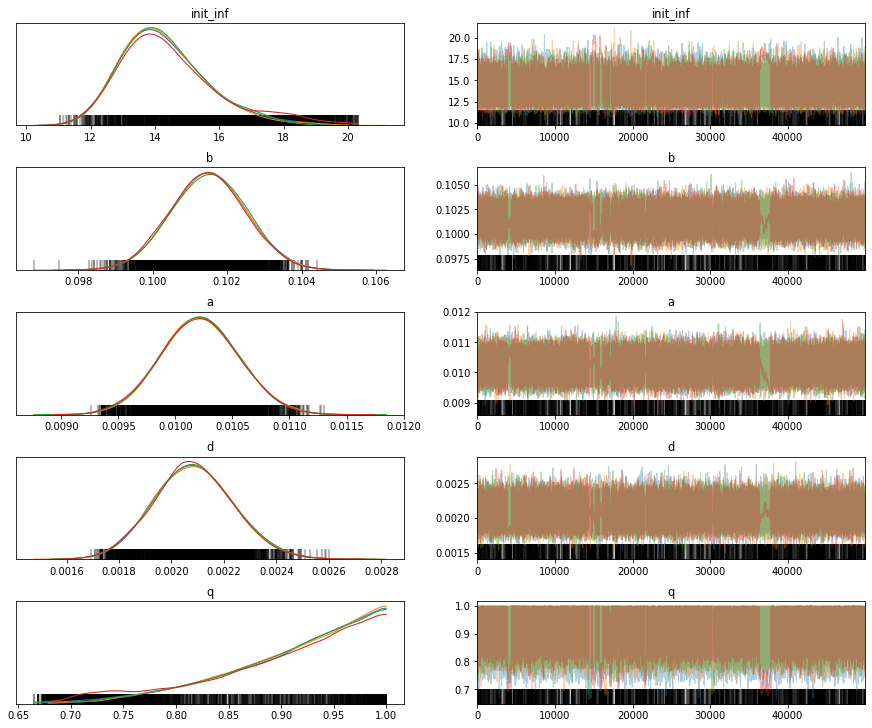

In [36]:
az.plot_trace(data_const, var_names=['init_inf', 'b', 'a', 'd', 'q'])

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fecc42c2c50>,
      dtype=object)

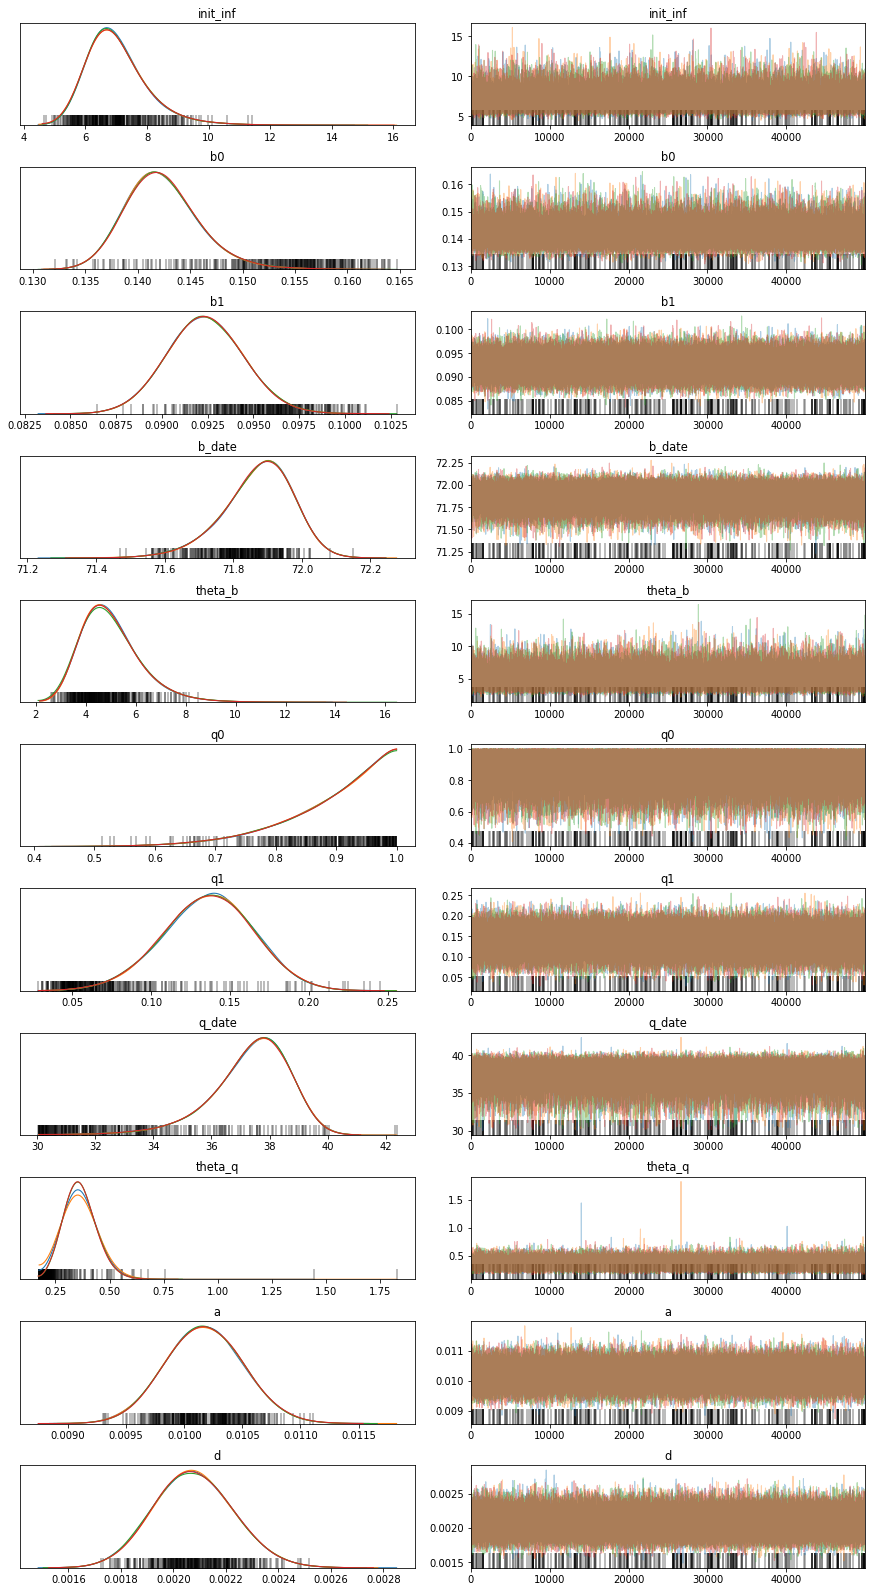

In [39]:
az.plot_trace(data_1, var_names=['init_inf', 'b0', 'b1', 'b_date', 'theta_b', 'q0', 'q1', 'q_date', 'theta_q', 'a', 'd'])

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fecc426a5d0>,
      dtype=object)

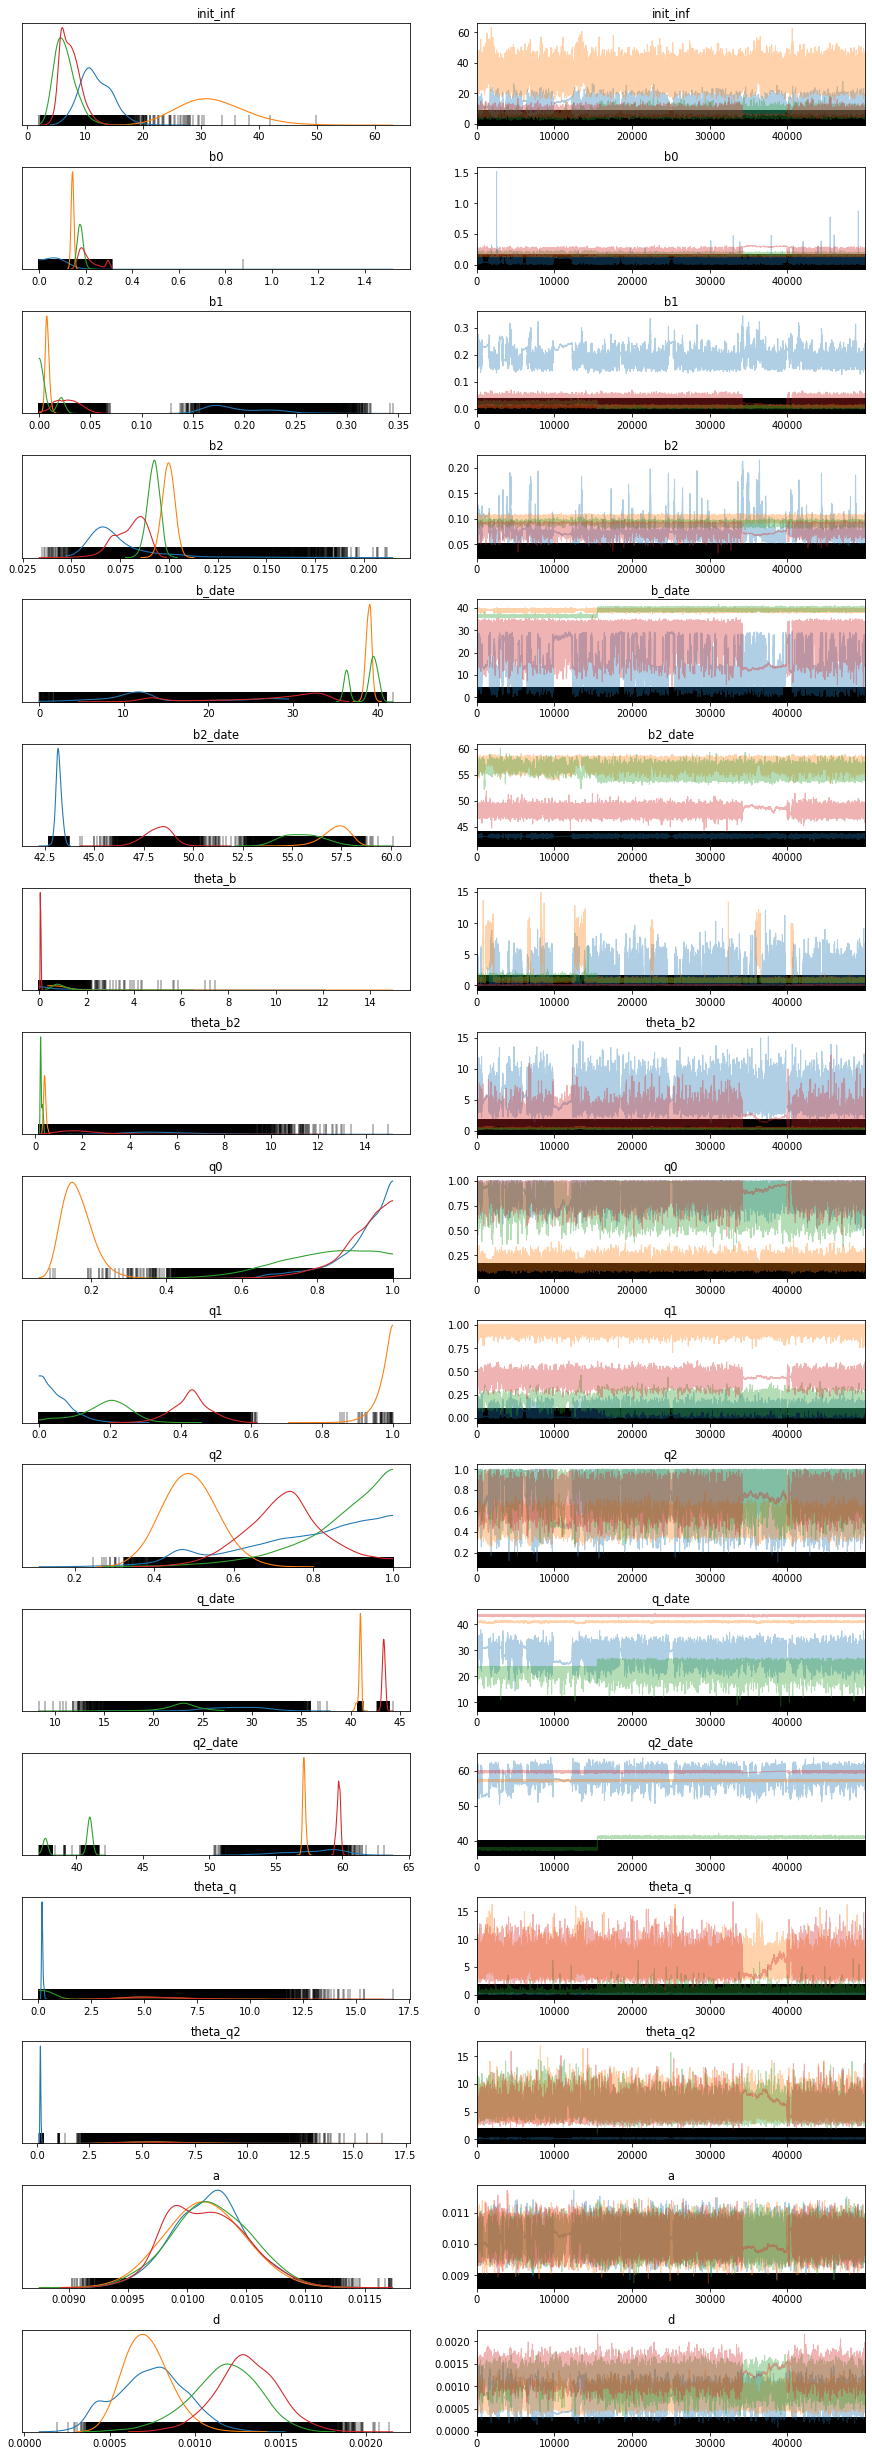

In [41]:
az.plot_trace(data_2, var_names=['init_inf', 'b0', 'b1', 'b2', 'b_date', 'b2_date', 'theta_b', 'theta_b2', 
                                 'q0', 'q1', 'q2', 'q_date', 'q2_date', 'theta_q', 'theta_q2', 'a', 'd'])

In [79]:
## Validation by simulation

In [46]:
def sigmoid(x, theta, t0):
    return 1/(1 + np.exp(-theta*(x-t0)))

In [120]:
def simulate(init_inf, b0, b1, theta_b, b_date, q0, q1, theta_q, q_date,
             a, d, horizon):
    S = init_inf;
    R = 0;
    D = 0;
    S_list = [S]
    R_list = [R]
    D_list = [D]
    b_list = [b0]
    q_list = [0]
    q = q0 + (q1 - q0) * sigmoid(0, theta_q, q_date)
    S0 = [scipy.stats.poisson.rvs(q*init_inf)]
    R0 = [scipy.stats.poisson.rvs(a * S0[0])]
    D0 = [scipy.stats.poisson.rvs(d * S0[0])]
    for t in range(horizon):
        b = b0 + (b1-b0) * sigmoid(t, theta_b, b_date)
        I = (S - R - D) * b * (1 - S/P)
        q = q0 + (q1 - q0) * sigmoid(t, theta_q, q_date)
        NR = a * (S - R - D)
        ND = d * (S - R - D)
        D = D + ND
        S = S + I
        R = R + NR
        S_list.append(S)
        R_list.append(R)
        D_list.append(D)
        b_list.append(b)
        q_list.append(q)
        NI0 = scipy.stats.poisson.rvs(q*I)
        NR0 = scipy.stats.poisson.rvs(a * (S0[-1] - R0[-1] - D0[-1]))
        ND0 = scipy.stats.poisson.rvs(d * (S0[-1] - R0[-1] - D0[-1]))
        S0.append(S0[-1]+NI0)
        R0.append(R0[-1]+NR0)
        D0.append(D0[-1]+ND0)
    data = pd.DataFrame({'S':np.array(S_list),
                        'R':np.array(R_list),
                        'D':np.array(D_list),
                        'b':np.array(b_list),
                        'q':np.array(q_list),
                        'S0':np.array(S0),
                        'R0':np.array(R0),
                        'D0':np.array(D0)},
                        index=pd.date_range(start=epoch, periods=horizon+1, freq='D'))
    return data

In [140]:
i = 1
fit = fit_start_1
horizon=(pd.to_datetime('2020-04-18') - pd.to_datetime('2020-02-01')).days
df = simulate(init_inf=fit['init_inf'][i],
                      b0=fit['b0'][i],
                      b1=fit['b1'][i],
                      theta_b=fit['theta_b'][i],
                      b_date=fit['b_date'][i],
                      q0=fit['q0'][i],
                      q1=fit['q1'][i],
                      theta_q=fit['theta_q'][i],
                      q_date=fit['q_date'][i],
                      a=fit['a'][i],
                      d=fit['d'][i],
                      horizon=horizon)
df['S0']

2020-02-01        6
2020-02-02        8
2020-02-03        9
2020-02-04       11
2020-02-05       11
              ...  
2020-04-14     7858
2020-04-15     8507
2020-04-16     9135
2020-04-17     9845
2020-04-18    10633
Freq: D, Name: S0, Length: 78, dtype: int64

In [141]:
C0 = df['S0'].values
R0 = df['R0'].values
D0 = df['D0'].values
data_simulated = {'T': C0.shape[0], 'P': P, 'C0': C0, 'R0': R0, 'D0':D0}

In [142]:
# Train the model and generate samples
fit_simulated = sm_1.sampling(data=data_simulated, iter=iteration, init=0)
fit_simulated


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_e893de0091dfdb2e05bc48442797c39f.
4 chains, each with iter=100000; warmup=50000; thin=1; 
post-warmup draws per chain=50000, total post-warmup draws=200000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
init_inf   6.69  3.1e-3   0.96   5.24   6.04   6.54   7.16   9.03  98570    1.0
b0         0.14  9.1e-6 2.9e-3   0.14   0.14   0.14   0.14   0.15 103764    1.0
b1         0.09  4.4e-6 1.9e-3   0.09   0.09   0.09   0.09    0.1 186442    1.0
theta_b    3.58  3.0e-3   1.28   1.71   2.67   3.37   4.25   6.66 182965    1.0
b_date    72.52  3.6e-4   0.15  72.22  72.41  72.52  72.62  72.81 182539    1.0
q0         0.89  3.1e-4   0.09   0.67   0.85   0.92   0.96    1.0  87300    1.0
q1         0.15  8.4e-5   0.02    0.1   0.13   0.15   0.17    0.2  87363    1.0
theta_q    0.44  2.4e-4   0.08   0.32   0.39   0.43   0.49   0.62 110224    1.0
q_date    38.71  1.9e-3   0.64  37.35  38.31 

In [143]:
(fit_start_1['init_inf'][i], fit_start_1['b0'][i], fit_start_1['b1'][i], fit_start_1['theta_b'][i], 
fit_start_1['b_date'][i], fit_start_1['q0'][i], fit_start_1['q1'][i], fit_start_1['theta_q'][i], fit_start_1['q_date'][7]
,fit_start_1['a'][i], fit_start_1['d'][i])

(6.8403082803783075,
 0.13895209061748734,
 0.09401974225782332,
 5.047605562969958,
 71.76436175016791,
 0.9515894358854123,
 0.16705464499052802,
 0.3621541460083603,
 37.399616051142274,
 0.010095409149613044,
 0.0023084567715685456)

In [216]:
### model selection

In [42]:
az.loo(data_const)

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/stats/stats.py:727: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/stats/stats.py:527: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is g

Computed from 200000 by 76 log-likelihood matrix

       Estimate       SE
IC_loo  3656.87   811.70
p_loo    132.69        -

There has been a warning during the calculation. Please check the results.

In [43]:
az.loo(data_1)

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/stats/stats.py:727: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/stats/stats.py:527: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "


Computed from 200000 by 76 log-likelihood matrix

       Estimate       SE
IC_loo  3369.42   794.75
p_loo    276.43        -

There has been a warning during the calculation. Please check the results.

In [44]:
az.compare({'const':data_const, '1-step':data_1})

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/stats/stats.py:1196: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
1-step,0,3433.71,308.576,0,0.79962,812.663,0,True,deviance
const,1,3645.97,127.235,212.26,0.20038,818.463,329.292,True,deviance


In [45]:
### Visualization ###

In [121]:
def monte_carlo(fit, horizon):
    S = pd.DataFrame()
    R = pd.DataFrame()
    D = pd.DataFrame()
    b = pd.DataFrame()
    q = pd.DataFrame()
    S0 = pd.DataFrame()
    R0 = pd.DataFrame()
    I0 = pd.DataFrame()
    D0 = pd.DataFrame()
    n = fit['init_inf'].shape[0]
    for k in range(repeat):
        i = np.random.randint(n)
        try:
            q0 = fit['q0'][i]
        except:
            q0 = 0
        
        df = simulate(init_inf=fit['init_inf'][i],
                      b0=fit['b0'][i],
                      b1=fit['b1'][i],
                      theta_b=fit['theta_b'][i],
                      b_date=fit['b_date'][i],
                      q0=q0,
                      q1=fit['q1'][i],
                      theta_q=fit['theta_q'][i],
                      q_date=fit['q_date'][i],
                      a=fit['a'][i],
                      d=fit['d'][i],
                      horizon=horizon)
        S = pd.concat([S, df['S']], axis=1)
        R = pd.concat([R, df['R']], axis=1)
        D = pd.concat([D, df['D']], axis=1)
        b = pd.concat([b, df['b']], axis=1)
        q = pd.concat([q, df['q']], axis=1)
        S0 = pd.concat([S0, df['S0']], axis=1)
        R0 = pd.concat([R0, df['R0']], axis=1)
        D0 = pd.concat([D0, df['D0']], axis=1)
        I0 = pd.concat([I0, df['S0'] - df['R0']], axis=1)
    return S, R, D, b, q, S0, R0, I0, D0
    

In [122]:
def extract_series(fit, name):
    value_list = []
    for d in range(S0.shape[0]):
        vals = fit['{}[{}]'.format(name, d+1)]
        value_list.append(vals)
    data = np.array(value_list)
    return pd.DataFrame(data, 
                        index=confirmed.index)

In [123]:
def draw(simulated, real=None, upto=pd.to_datetime('2020-04-18')):
    graph=pd.DataFrame(index=pd.date_range(start=epoch, end=upto))
    simulated = simulated.dropna(axis=1)
    median = simulated.median(axis=1)
    upper = simulated.quantile(q=0.75, axis=1)
    lower = simulated.quantile(q=0.25, axis=1)
    if not real is None:
        graph['Real'] = real
    graph['Median'] = median
    graph['Upper'] = upper
    graph['Lower'] = lower
    sns.relplot(kind="line", data=graph, aspect=2)

In [124]:
S, R, D, b, q, S0, R0, I0, D0 = monte_carlo(fit_start_1, 120)

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


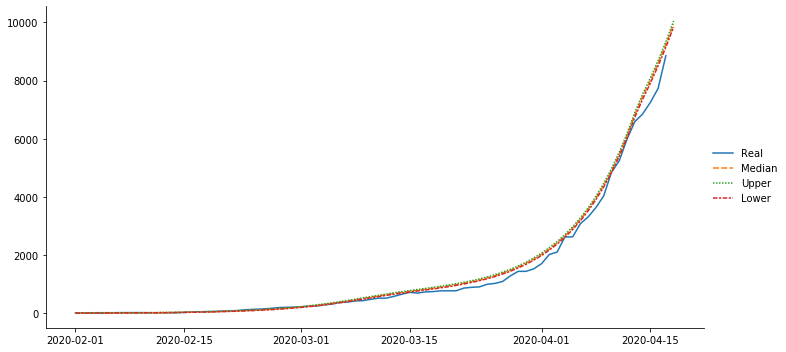

In [125]:
draw(I0, real=(confirmed-recovered)[country])

In [126]:
S.median(axis=1)[pd.to_datetime('2020-04-18')]

75684.28264763337

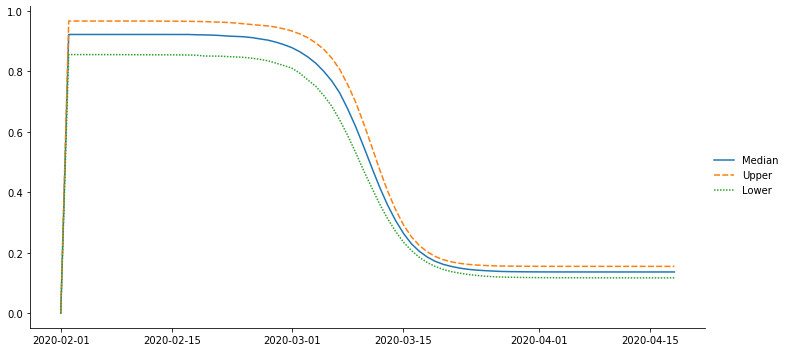

In [127]:
draw(q)

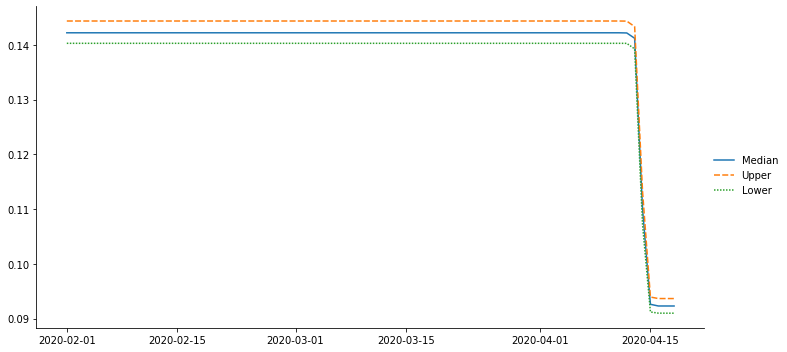

In [128]:
draw(b)

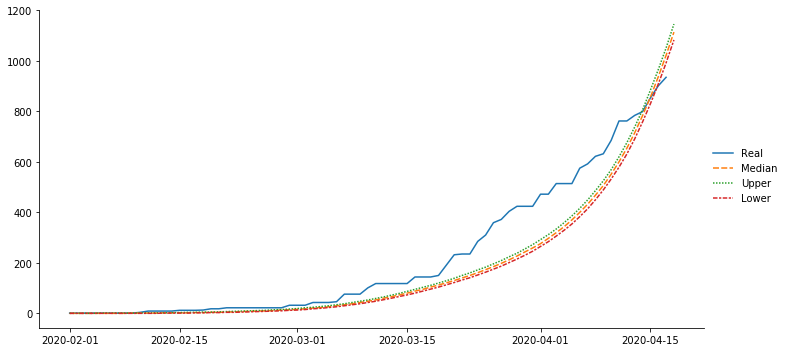

In [129]:
draw(R0, real=recovered[country])

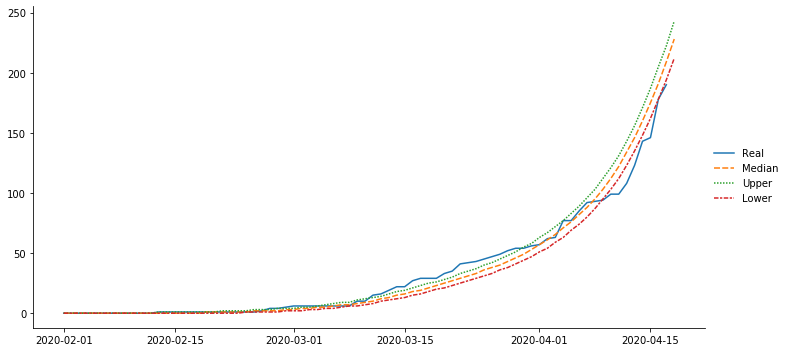

In [130]:
draw(D0, real=death[country])

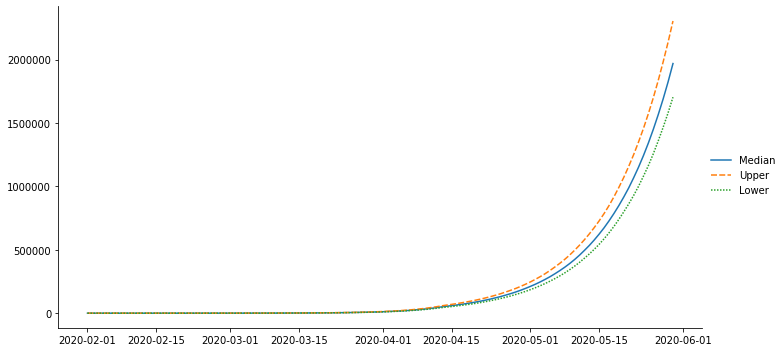

In [131]:
draw(S, upto=pd.to_datetime('2020-05-30'))

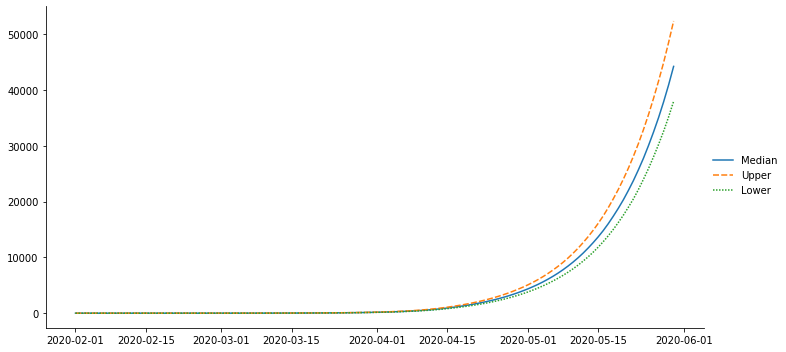

In [132]:
draw(D, upto=pd.to_datetime('2020-05-30'))

In [ ]:
## Saving results

In [57]:
import pickle
with open("sm1_fit.pkl", "wb") as f:
    pickle.dump({'model' : sm_1, 'fit' : fit_start_1}, f, protocol=-1)
    # or with a list
    # pickle.dump([model, fit], f, protocol=-1)

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
import pickle
with open("sm2_fit.pkl", "wb") as f:
    pickle.dump({'model' : sm_2, 'fit' : fit_start_2}, f, protocol=-1)
    # or with a list
    # pickle.dump([model, fit], f, protocol=-1)

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
import pickle
with open("sm_const_fit.pkl", "wb") as f:
    pickle.dump({'model' : sm_const, 'fit' : fit_const}, f, protocol=-1)
    # or with a list
    # pickle.dump([model, fit], f, protocol=-1)

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  This is separate from the ipykernel package so we can avoid doing imports until
